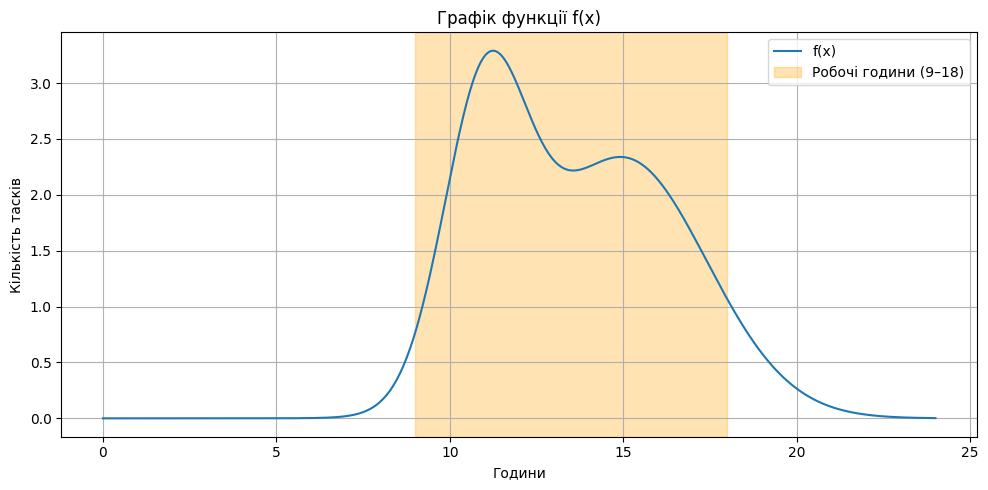

Невизначений інтеграл:
4.94974746830583⋅√2⋅erf(0.294627825494395⋅x - 4.41941738241592) + 2.8284271247 ↪

↪ 4619⋅√2⋅erf(0.58925565098879⋅x - 6.48181216087669)

Інтеграл від 9 до 18:
14.178654163478*sqrt(2)
Метод прямокутників (середня точка): 20.051650355186126
Метод трапецій: 20.051634332194133
Метод Сімпсона: 20.05164501419635
Інтеграл за допомогою scipy.integrate.quad: 20.051645014188306


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import quad

# Символьна змінна
x = sp.Symbol('x')
pi = sp.pi
e = sp.E

# Опис функції
f_sym = 2 * (
    (4 / (1.2 * sp.sqrt(2 * pi))) * sp.exp(-0.5 * ((x - 11) / 1.2)**2) +
    (7 / (2.4 * sp.sqrt(2 * pi))) * sp.exp(-0.5 * ((x - 15) / 2.4)**2)
)

# Завдання 1: Невизначений та визначений інтеграли

# Невизначений інтеграл
F_sym = sp.integrate(f_sym, x)

# Визначений інтеграл від a до b
a, b = 9, 18
definite_integral_sym = sp.integrate(f_sym, (x, a, b))

# Побудова графіка
x_vals = np.linspace(0, 24, 500)
f_numeric = sp.lambdify(x, f_sym, modules=["numpy"])
y_vals = f_numeric(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='f(x)')
plt.axvspan(a, b, color='orange', alpha=0.3, label='Робочі години (9–18)')
plt.title('Графік функції f(x)')
plt.xlabel('Години')
plt.ylabel('Кількість тасків')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Невизначений інтеграл:")
sp.pprint(F_sym)

print("\nІнтеграл від 9 до 18:")
print(definite_integral_sym)

# Завдання 2: Метод прямокутників (ліва/права/середня точка)

def rectangle_integration(f, a, b, n, method='mid'):
    h = (b - a) / n
    result = 0
    for i in range(n):
        if method == 'left':
            x_i = a + i * h
        elif method == 'right':
            x_i = a + (i + 1) * h
        else:  # mid
            x_i = a + (i + 0.5) * h
        result += f(x_i)
    return result * h

# Параметри
n = 1000
f_num = sp.lambdify(x, f_sym, modules=["numpy"])
rect_result = rectangle_integration(f_num, a, b, n)
print("Метод прямокутників (середня точка):", rect_result)

# Завдання 3: Метод трапецій
def trapezoid_integration(f, a, b, n):
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    return result * h

trap_result = trapezoid_integration(f_num, a, b, n)
print("Метод трапецій:", trap_result)

# Завдання 4: Метод Сімпсона
def simpson_integration(f, a, b, n):
    if n % 2 == 1:
        n += 1  # n має бути парним
    h = (b - a) / n
    result = f(a) + f(b)
    for i in range(1, n):
        coef = 4 if i % 2 == 1 else 2
        result += coef * f(a + i * h)
    return result * h / 3

simpson_result = simpson_integration(f_num, a, b, n)
print("Метод Сімпсона:", simpson_result)

#Завдання 5: scipy.integrate.quad
quad_result, _ = quad(f_num, a, b)
print("Інтеграл за допомогою scipy.integrate.quad:", quad_result)
